# Homework8 - datatalks.club - Rui Pinto

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import scipy

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

> Note: it's very likely that in this homework your answers won't match the options exactly. That's okay and expected. Select the option that's closest to your solution.

## Data Preparation

In [63]:
#wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
#!unzip data.zip

In [64]:
!ls data

test  train


In [65]:
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

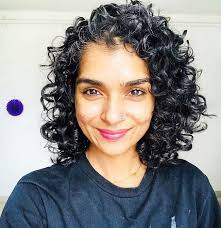

In [66]:
# checking dataset
path = './data/train/curly'
name = 'image21.jpeg'
fullname = f'{path}/{name}'
load_img(fullname)

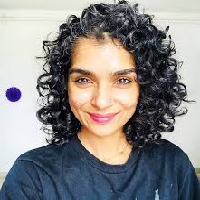

In [67]:
# resize image
img = load_img(fullname, target_size=(200, 200))
img

## Model

You need to develop the model with following structure:

- The shape for input should be (200, 200, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:

- SGD(lr=0.002, momentum=0.8)

In [68]:
# Define the model
model = Sequential()

# Input layer and first Conv2D + MaxPooling2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Question 1
Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

In [69]:
# response = binary_crossentropy

### Question 2
What's the total number of parameters of the model? You can use the summary method for that.

- 896
- 11214912
- 15896912
- 20072512

In [70]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

## Generators and Training

In [71]:
# Create an ImageDataGenerator for rescaling
train_gen = ImageDataGenerator(rescale=1./255)

# Train and test generators
train_generator = train_gen.flow_from_directory(
    './data/train',  # actual path to your train data
    target_size=(200, 200),     # Resize images to 200x200
    batch_size=20,              # Use batch size of 20
    class_mode='binary',        # For binary classification
    shuffle=True                # Shuffle the training data
)

Found 800 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'curly': 0, 'straight': 1}

In [73]:
# Create an ImageDataGenerator for rescaling
val_gen = ImageDataGenerator(rescale=1./255)

# Train and test generators
test_generator = val_gen.flow_from_directory(
    './data/test',  # actual path to your train data
    target_size=(200, 200),     # Resize images to 200x200
    batch_size=20,              # Use batch size of 20
    class_mode='binary',        # For binary classification
    shuffle=True                # Shuffle the training data
)

Found 201 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'curly': 0, 'straight': 1}

In [75]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5101 - loss: 0.7347 - val_accuracy: 0.6219 - val_loss: 0.6494
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6602 - loss: 0.6178 - val_accuracy: 0.6169 - val_loss: 0.6260
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6782 - loss: 0.5909 - val_accuracy: 0.6269 - val_loss: 0.6359
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.6893 - loss: 0.5692 - val_accuracy: 0.6368 - val_loss: 0.6190
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7131 - loss: 0.5610 - val_accuracy: 0.6368 - val_loss: 0.6243
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.7404 - loss: 0.5202 - val_accuracy: 0.5871 - val_loss: 0.7265
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6964 - loss: 0.5548 - val_accuracy: 0.6468 - val_loss: 0.6164
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7404 - loss: 0.5047 - val_accuracy: 0.

### Question 3
What is the median of training accuracy for all the epochs for this model?

- 0.10
- 0.32
- 0.50
- 0.72

In [76]:
training_accuracy = history.history['accuracy']
training_accuracy

[0.5274999737739563,
 0.637499988079071,
 0.6712499856948853,
 0.6825000047683716,
 0.7012500166893005,
 0.7250000238418579,
 0.7225000262260437,
 0.7649999856948853,
 0.7574999928474426,
 0.762499988079071]

In [77]:
np.median(training_accuracy)

0.7118750214576721

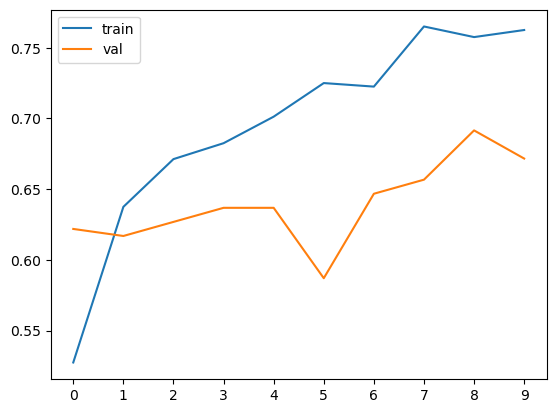

In [78]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Question 4
What is the standard deviation of training loss for all the epochs for this model?

- 0.028
- 0.068
- 0.128
- 0.168

In [79]:
np.std(training_accuracy)

0.06865858234738002

## Data Augmentation

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

In [81]:
# Create an ImageDataGenerator for rescaling
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and test generators
train_generator = train_gen.flow_from_directory(
    './data/train',  # actual path to your train data
    target_size=(200, 200),     # Resize images to 200x200
    batch_size=20,              # Use batch size of 20
    class_mode='binary',        # For binary classification
    shuffle=True,               # Shuffle the training data
)

Found 800 images belonging to 2 classes.


In [86]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.6827 - loss: 0.6062 - val_accuracy: 0.7114 - val_loss: 0.6098
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.6780 - loss: 0.5920 - val_accuracy: 0.6965 - val_loss: 0.5694
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.6982 - loss: 0.5737 - val_accuracy: 0.7214 - val_loss: 0.5639
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.6870 - loss: 0.5973 - val_accuracy: 0.6866 - val_loss: 0.5907
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.6453 - loss: 0.6200 - val_accuracy: 0.7065 - val_loss: 0.5587
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.7189 - loss: 0.5504 - val_accuracy: 0.7114 - val_loss: 0.5605
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.6882 - loss: 0.5886 - val_accuracy: 0.7264 - val_loss: 0.5317
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.7151 - loss: 0.5556 - val_accu

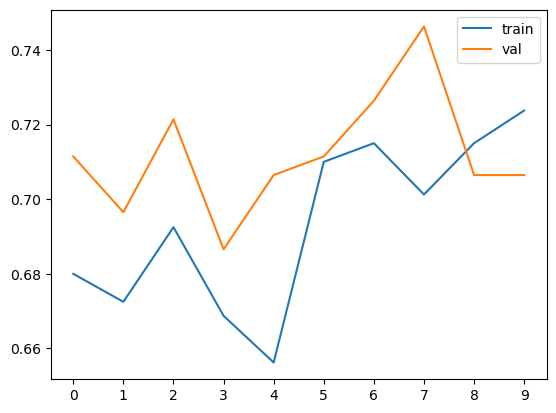

In [96]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Question 5

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.26
- 0.56
- 0.86
- 1.16

In [90]:
np.mean(history.history['val_loss'])

0.5649250328540802

### Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.31
- 0.51
- 0.71
- 0.91

In [95]:
np.mean(history.history['val_accuracy'][5:])

0.7194029927253723